In [88]:
import tensorflow

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

In [69]:
cnn = Sequential()

In [70]:
cnn.add(Conv2D(32, (3,3), input_shape= (150,150,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())


c:\ProgramData\anaconda3\envs\bia\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
cnn.add(Dense(512, activation="relu")),
cnn.add(Dropout(0.5)),
cnn.add(Dense(4, activation="softmax"))

In [72]:
cnn.compile(optimizer='adam', loss=CategoricalCrossentropy, metrics=['accuracy'])

In [73]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'E:\DL\Brain_Tumor\Training',
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        r'E:\DL\Brain_Tumor\Testing',
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

categories = ["glioma", "meningioma", "no tumor", "pituitary"]


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [74]:
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [91]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn.fit(
            train_generator,
            steps_per_epoch=200,
            epochs=epochs,
            validation_data=test_generator,
            validation_steps=200,
            callbacks = [early_stopping]
            )

Epoch 1/50
179/200 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.9845 - loss: 0.0444

c:\ProgramData\anaconda3\envs\bia\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 97s 480ms/step - accuracy: 0.9846 - loss: 0.0445 - val_accuracy: 0.9825 - val_loss: 0.0505
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 93s 457ms/step - accuracy: 0.9846 - loss: 0.0382 - val_accuracy: 0.9863 - val_loss: 0.0388
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 93s 455ms/step - accuracy: 0.9820 - loss: 0.0522 - val_accuracy: 0.9825 - val_loss: 0.0563
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 468ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9825 - val_loss: 0.0464
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 468ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 122s 606ms/step - accuracy: 0.9917 - loss: 0.0241 - val_accuracy: 0.9687 - val_loss: 0.1002
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 164s 796ms/step - accuracy: 0.9877 - loss: 0.0313 - val_accuracy: 0.9870 - val_loss: 0.0442


In [92]:
loss, accuracy = cnn.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9835 - loss: 0.0455
Test Loss: 0.03833535686135292
Test Accuracy: 0.9867187738418579


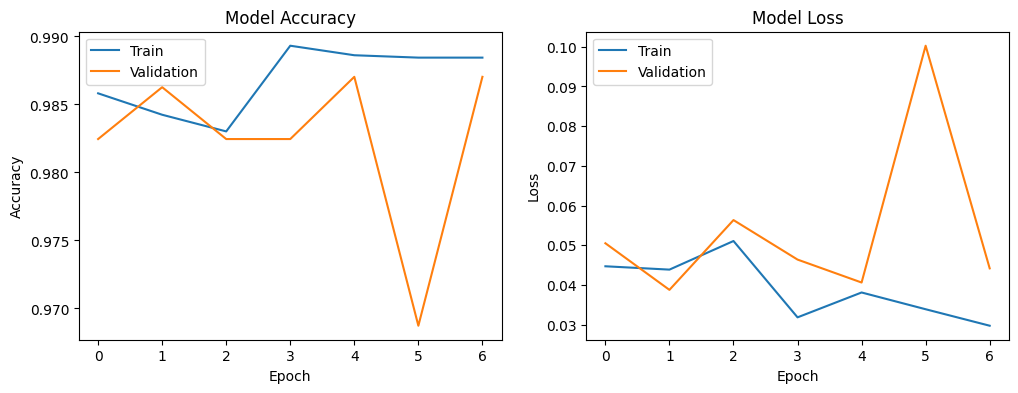

In [96]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

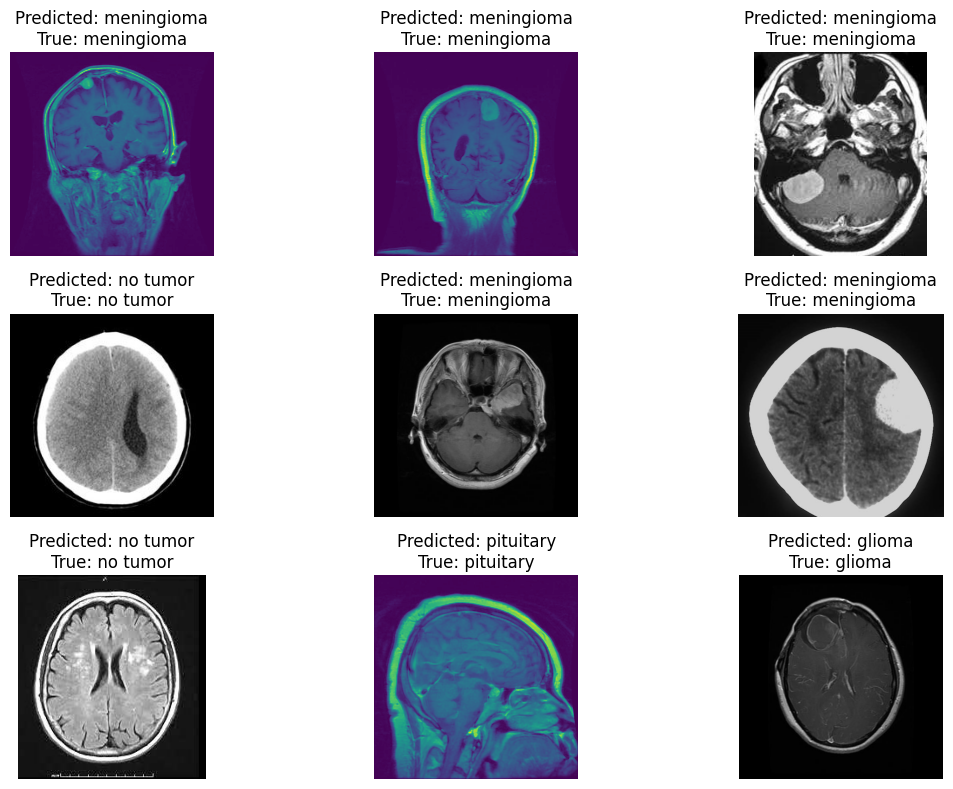

In [112]:
# Assuming `test_images` contains the filenames and `test_generator` is a valid ImageDataGenerator
test_images = test_generator.filenames

# Randomly select 9 sample images for display
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]

# Replace with actual predicted and true labels if available
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

# Path to your testing directory
test_dir = r'E:\DL\Brain_Tumor\Testing'

# Display the images and their predicted/true labels
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    
    # Full path to the image file
    image_path = f'{test_dir}\\{sample_images[i]}'
    
    # Read and display the image
    img = plt.imread(image_path)
    plt.imshow(img)
    
    # Set title with predicted and true labels
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
